In [138]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
from my_code.aux_functions import *
from my_code.parameters import *
from my_code.network import *
from my_code.tests import *

In [256]:
stimulation = 'none'
net_params = get_default_net_params()
test_params = get_dft_test_params()

net_params['prob_pp'].set_param(0.1)

net_params['g_pp'].set_param(0.0)
net_params['g_pb'].set_param(.7)
net_params['g_bp'].set_param(0.00)
net_params['g_bb'].set_param(0)

net_params['tau_d_b'].set_param(1.5)

net_params['J_spi_p'].set_param(0)

net_params['curr_bg_p'].set_param(200)
net_params['curr_bg_b'].set_param(200)

test_params['sim_time'].set_param(4)
test_params['stim_strength'].set_param(0)

In [265]:
built_network, used_net_params = build_network(net_params,initial_condition='none')
built_network, test_params = record_network(built_network, used_net_params, test_params)
sim_dt = test_params['sim_dt'].get_param()
defaultclock.dt = sim_dt
tested_network, test_params = run_test(built_network, test_params, used_net_params, stimulation = stimulation)
ready_monitors, test_data, test_params = prepare_test(tested_network, test_params, used_net_params)

BP Model with Adaptation
Neuron type: adaptive leaky integrate-and-fire
Total number of synapses
P->P: 6,718,333
B->P: 553,659
P->B: 221,323
B->B: 3,695
Starting simulation at t=2. s for a duration of 100. ms
100. ms (100%) simulated in < 1s
Starting simulation at t=2.1 s for a duration of 4. s
4. s (100%) simulated in 9s


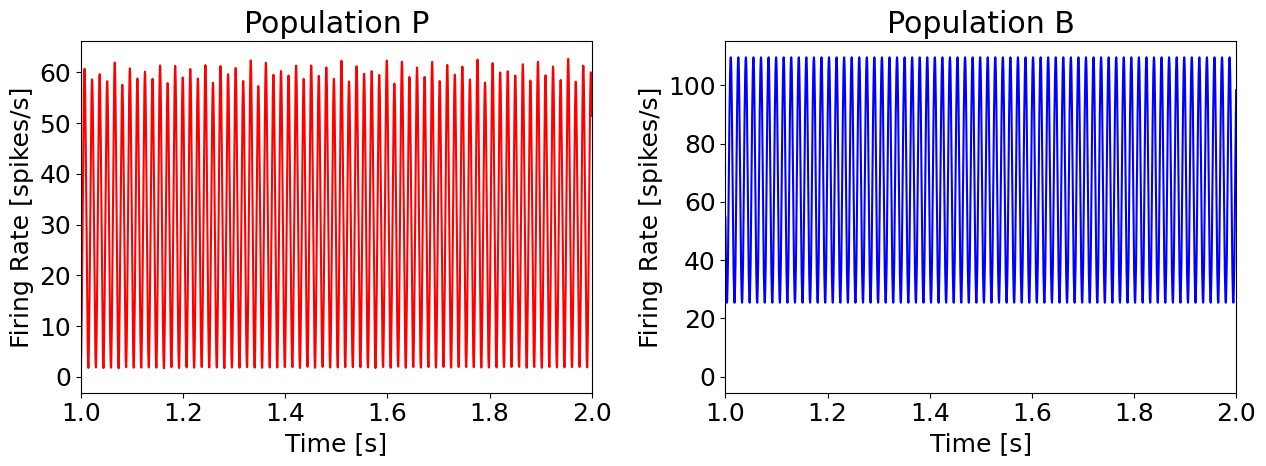

In [268]:
start = 0
end = 4
fig = figure(figsize=(13,5))
plt.rcParams['font.size'] = '18'
subplot(121)
plt.plot(ready_monitors['rtm_p'][0],ready_monitors['rtm_p'][1],color='red')
plt.xlabel('Time [s]')
plt.ylabel('Firing Rate [spikes/s]')
plt.title('Population P')
# plt.xlim([start,end])
plt.xlim([1,2])
subplot(122) 
plt.plot(ready_monitors['rtm_b'][0],ready_monitors['rtm_b'][1],color='blue')
plt.xlabel('Time [s]')
plt.ylabel('Firing Rate [spikes/s]')
plt.title('Population B')
# plt.xlim([start,end])
plt.xlim([1,2])
fig.tight_layout()
plt.show()

In [259]:
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')

P firing overall: 30.81 spikes/s
B firing overall: 67.58 spikes/s


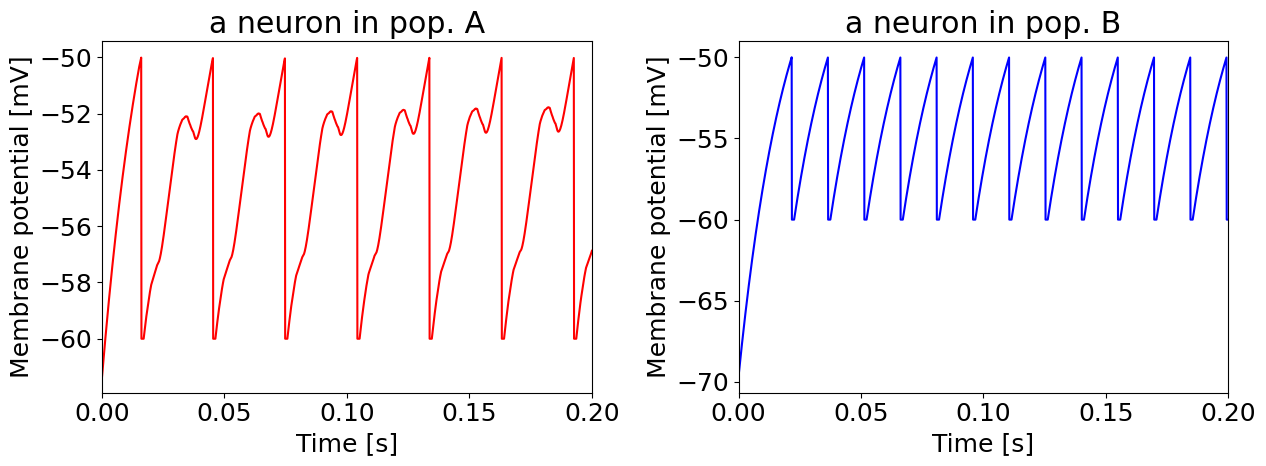

In [260]:
start = 0
end = 4
fig = figure(figsize=(13,5))
plt.rcParams['font.size'] = '18'
subplot(121)
plt.plot(built_network['stm_p_mempo'].t,built_network['stm_p_mempo'].v[0]/mV,color='red')
plt.xlabel('Time [s]')
plt.ylabel('Membrane potential [mV]')
plt.title('a neuron in pop. A')
plt.xlim([0,0.2])
subplot(122)
plt.plot(built_network['stm_b_mempo'].t,built_network['stm_b_mempo'].v[0]/mV,color='blue')
plt.rcParams['font.size'] = '18'
plt.xlabel('Time [s]')
plt.ylabel('Membrane potential [mV]')
plt.title('a neuron in pop. B')
plt.xlim(0,.2)
fig.tight_layout()
plt.show()

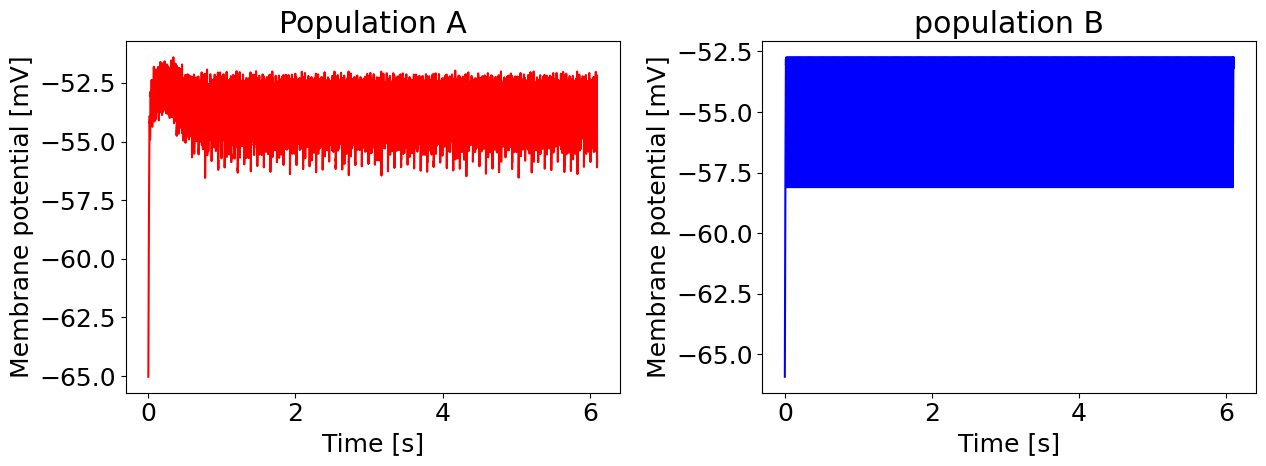

In [261]:
fig = figure(figsize=(13,5))
subplot(121)
plt.plot(ready_monitors['stm_p_mempo'][0],ready_monitors['stm_p_mempo'][1],color='red')
# plt.plot(ready_monitors['stm_b_mempo'][0],ready_monitors['stm_b_mempo'][1],color='blue')
plt.rcParams['font.size'] = '18'
plt.xlabel('Time [s]')
plt.ylabel('Membrane potential [mV]')
plt.title('Population A')
subplot(122)
plt.plot(ready_monitors['stm_b_mempo'][0],ready_monitors['stm_b_mempo'][1],color='blue')
plt.rcParams['font.size'] = '18'
plt.xlabel('Time [s]')
plt.ylabel('Membrane potential [mV]')
plt.title('population B')
fig.tight_layout()
plt.show()

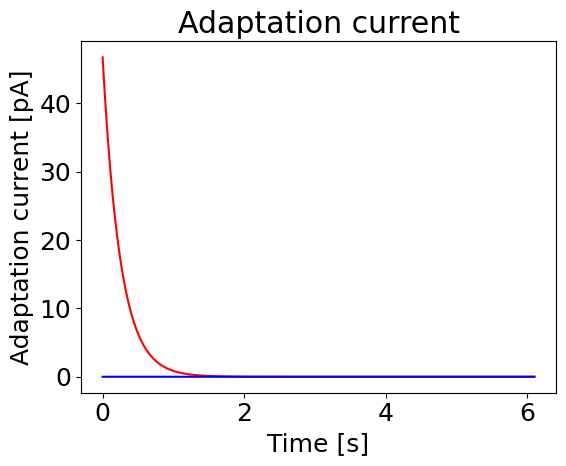

In [262]:
fig = figure(figsize=(6,5))
plt.plot(ready_monitors['stm_p_adp'][0],ready_monitors['stm_p_adp'][1],color='red')
plt.plot(ready_monitors['stm_b_adp'][0],ready_monitors['stm_b_adp'][1],color='blue')
plt.rcParams['font.size'] = '18'
plt.xlabel('Time [s]')
plt.ylabel('Adaptation current [pA]')
plt.title('Adaptation current')
fig.tight_layout()
plt.show()

In [263]:
print('Event duration:',"%.1f" % np.mean(test_data['event_durations']),'ms')
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')
print('P firing non-states:',"%.2f" % np.mean(test_data['rtm_p_nswr']),'spikes/s')
print('B firing non-states:',"%.2f" % np.mean(test_data['rtm_b_nswr']),'spikes/s')
print('P firing event:',"%.2f" % np.mean(test_data['rtm_p_event']),'spikes/s')
print('B firing event:',"%.2f" % np.mean(test_data['rtm_b_event']),'spikes/s')
print('Peak time B:',"%.1f" % np.mean(0.1*test_data['rtm_b_event_argmax']),'ms')
print('Peak time P:',"%.1f" % np.mean(0.1*test_data['rtm_p_event_argmax']),'ms')

Event duration: 129.1 ms
P firing overall: 30.81 spikes/s
B firing overall: 67.58 spikes/s
P firing non-states: nan spikes/s
B firing non-states: nan spikes/s
P firing event: 30.67 spikes/s
B firing event: 67.61 spikes/s
Peak time B: 6.0 ms
Peak time P: 50.8 ms


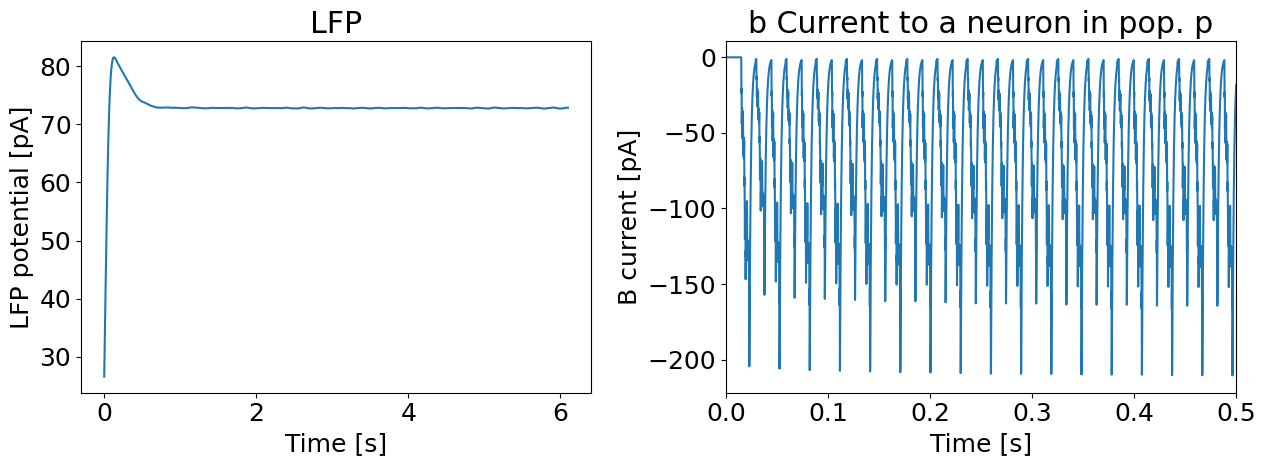

In [264]:
fig = figure(figsize=(13,5))
subplot(121)
plt.plot(ready_monitors['lowpass_lfp'][0],ready_monitors['lowpass_lfp'][1])
plt.xlabel('Time [s]')
plt.ylabel('LFP potential [pA]')
plt.title('LFP')
subplot(122)
plt.plot(built_network['stm_pb'].t,built_network['stm_pb'].curr_b[49]/pA)
plt.xlim(0,.5)
plt.xlabel('Time [s]')
plt.ylabel('B current [pA]')
plt.title('b Current to a neuron in pop. p')
fig.tight_layout()
plt.show()

In [253]:
test_data['n_events']

11